### Conjunto de entrenamiento y de testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datasets/customer-churn-model/Customer Churn Model.txt')
data.sample(4)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
435,MT,58,510,387-9301,no,yes,29,240.4,80,40.87,...,91,10.11,164.2,108,7.39,11.2,3,3.02,1,False.
2133,MN,129,510,368-6892,no,yes,31,193.0,99,32.81,...,87,19.11,197.6,91,8.89,10.3,8,2.78,2,False.
1981,ME,66,510,331-6270,no,no,0,118.0,133,20.06,...,99,21.09,214.4,122,9.65,5.3,5,1.43,1,False.
1108,WY,151,510,381-4712,no,no,0,235.9,104,40.10,...,91,6.85,212.8,116,9.58,5.8,2,1.57,3,False.


### Dividir usando la distribución normal

(array([ 19., 111., 343., 681., 895., 739., 370., 153.,  19.,   3.]),
 array([-3.20689175, -2.51004171, -1.81319168, -1.11634164, -0.41949161,
         0.27735843,  0.97420846,  1.67105849,  2.36790853,  3.06475856,
         3.7616086 ]),
 <BarContainer object of 10 artists>)

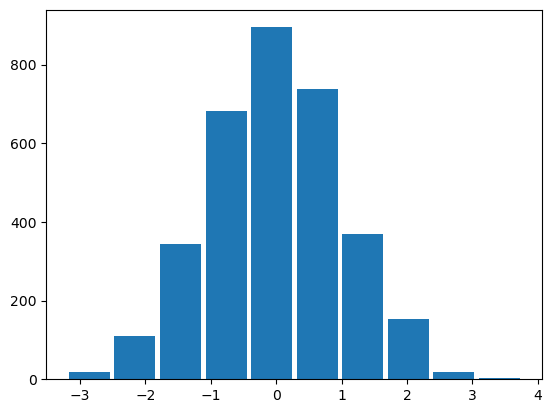

In [3]:
a = np.random.randn(len(data))
plt.hist(a, rwidth=0.9)

In [4]:
check = (a<0.8)

training = data[check]
testing = data[~check]

### Dividir usando sklearn

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train, test = train_test_split(data, test_size=0.2)

### Dividir usando función shuffle

In [7]:
from sklearn.utils import shuffle

In [8]:
data = shuffle(data)

In [9]:
cut_id = int(0.8*len(data))
training = data[:cut_id]
testing = data[cut_id+1:]

### Concatenar dataset

In [10]:
red_vine = pd.read_csv('../datasets/wine/winequality-red.csv', sep=';')
red_vine.sample(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
86,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
1147,10.0,0.41,0.45,6.2,0.071,6.0,14.0,0.99702,3.21,0.49,11.8,7
514,10.5,0.51,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.8,7
1530,6.6,0.44,0.09,2.2,0.063,9.0,18.0,0.99444,3.42,0.69,11.3,6


In [11]:
red_vine.shape

(1599, 12)

In [12]:
white_vine = pd.read_csv('../datasets/wine/winequality-white.csv', sep=';')
white_vine.sample(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1232,7.9,0.440,0.37,5.85,0.033,27.0,93.0,0.99200,3.16,0.54,12.600000,7
3030,7.1,0.470,0.29,14.80,0.024,22.0,142.0,0.99518,3.12,0.48,12.000000,8
955,7.6,0.345,0.26,1.90,0.043,15.0,134.0,0.99360,3.08,0.38,9.500000,5
4372,7.1,0.230,0.23,3.50,0.038,23.0,112.0,0.99157,3.05,0.37,11.366667,6


In [13]:
white_vine.shape

(4898, 12)

In [14]:
wine = pd.concat([red_vine, white_vine], axis=0)
wine.sample(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1695,7.2,0.21,0.33,3.0,0.036,35.0,132.0,0.99280,3.25,0.40,11.0,6
3680,6.8,0.15,0.41,12.9,0.044,79.5,183.0,0.99742,3.24,0.78,10.2,6
2908,6.2,0.20,0.31,1.0,0.031,22.0,73.0,0.99035,3.24,0.52,11.3,6
102,6.0,0.21,0.24,12.1,0.050,55.0,164.0,0.99700,3.34,0.39,9.4,5


In [15]:
wine.shape

(6497, 12)

In [16]:
data1 = wine.head(10)
data2 = wine.tail(10)

In [19]:
wine_scramble = pd.concat([data1, data2], axis=0)
wine_scramble

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


### Datos distribuidos

In [21]:
data = pd.read_csv('../datasets/distributed-data/001.csv')
data.head()

,Date,sulfate,nitrate,ID
0,2003-01-01,NaN,NaN,1
1,2003-01-02,NaN,NaN,1
2,2003-01-03,NaN,NaN,1
3,2003-01-04,NaN,NaN,1
4,2003-01-05,NaN,NaN,1


In [22]:
data.shape

(1461, 4)

In [31]:
filepath = '../datasets/distributed-data/'

for i in range(2, 333):
    name = '00' + str(i)
    name = name[len(name)-3:]
    name = name + '.csv'
    file = pd.read_csv(filepath + name)
    data = pd.concat([data, file], axis=0)    

In [32]:
data.shape

(772087, 4)

In [33]:
data.sample(5)

,Date,sulfate,nitrate,ID
393,2002-01-29,5.25000,7.21,98
1037,2004-11-03,NaN,NaN,250
794,2003-03-06,NaN,NaN,177
2112,2006-10-14,2.03529,NaN,296
1359,2004-09-21,4.12000,NaN,297
